In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("C:\\Users\\kanan\\Desktop\\Study Material\\In-house CP\\Untitled Folder\\cleaned_weatherAUS.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109523 entries, 0 to 109522
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109523 non-null  object 
 1   Location       109523 non-null  object 
 2   MinTemp        109523 non-null  float64
 3   MaxTemp        109523 non-null  float64
 4   Rainfall       109523 non-null  float64
 5   WindGustDir    109523 non-null  object 
 6   WindGustSpeed  109523 non-null  float64
 7   WindDir9am     109523 non-null  object 
 8   WindDir3pm     109523 non-null  object 
 9   WindSpeed9am   109523 non-null  float64
 10  WindSpeed3pm   109523 non-null  float64
 11  Humidity9am    109523 non-null  float64
 12  Humidity3pm    109523 non-null  float64
 13  Pressure9am    109523 non-null  float64
 14  Pressure3pm    109523 non-null  float64
 15  Temp9am        109523 non-null  float64
 16  Temp3pm        109523 non-null  float64
 17  RainToday      109523 non-nul

In [4]:
Direction = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
Degree = []

x = 0
for i in range(0,337,22):
    Degree.append(i+x)
    x = x + 0.5
    
Direction_Degree = dict(zip(Direction,Degree))
print(Direction_Degree)

#Converting WindGustDir, WindDir9am, WindDir3pm to degree format

df = df.replace({"WindGustDir": Direction_Degree})
df = df.replace({"WindDir9am": Direction_Degree})
df = df.replace({"WindDir3pm": Direction_Degree})

{'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5}


In [5]:
df = df.drop(columns = ['Date', 'Location', 'Month'],axis=1)

In [6]:
df.isna().mean().round(4) * 100

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [7]:
from sklearn.preprocessing import LabelEncoder

cat_f = [x for x in df.columns if df[x].dtype == 'object']
print(cat_f)

# traversing all columns for converting into continuous valriables
for name in cat_f:
    enc = LabelEncoder()
    enc.fit(list(df[name].values.astype('str')) + list(df[name].values.astype('str')))
    df[name] = enc.transform(df[name].values.astype('str'))

['RainToday', 'RainTomorrow']


In [8]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,16.8,0.0,112.5,24.0,112.5,90.0,9.0,9.0,82.0,45.0,1024.9,1020.2,7.0,16.0,0,0
1,6.1,20.7,0.0,45.0,43.0,135.0,45.0,4.0,24.0,80.0,54.0,1016.6,1010.8,10.2,20.3,0,1
2,6.3,16.9,1.4,315.0,35.0,112.5,292.5,6.0,13.0,85.0,58.0,1014.4,1012.3,12.5,15.5,1,0
3,2.1,15.0,0.0,292.5,30.0,112.5,315.0,4.0,11.0,81.0,54.0,1019.5,1017.9,8.6,14.9,0,0
4,1.6,16.6,0.0,45.0,37.0,135.0,45.0,9.0,20.0,79.0,47.0,1018.4,1011.4,8.3,15.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109518,3.5,21.8,0.0,90.0,31.0,112.5,90.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
109519,2.8,23.4,0.0,90.0,31.0,135.0,67.5,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
109520,3.6,25.3,0.0,337.5,22.0,135.0,0.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
109521,5.4,26.9,0.0,0.0,37.0,135.0,292.5,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [9]:
#Preprocessing from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Algos from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Postprocessing from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

C:\Users\kanan\anaconda3\envs\weatherforecast\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [10]:
# Dividing Data into features and target for classifier
X_train = df.drop(['RainTomorrow'], axis=1)
y_train = df['RainTomorrow']

In [11]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


0    92378
1    17145
Name: RainTomorrow, dtype: int64


<AxesSubplot:>

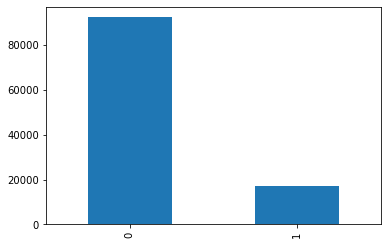

In [12]:
from imblearn.over_sampling import SMOTE
bal = SMOTE()

print(y_train.value_counts())
pd.Series(y_train).value_counts().plot.bar()

<AxesSubplot:>

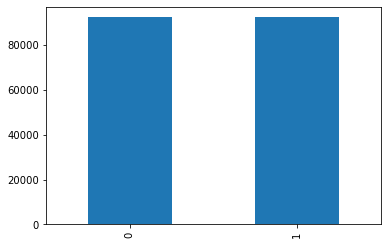

In [13]:
# balancing both classes
X_train, y_train = bal.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts().plot.bar()

In [14]:
# our test dataset doesn't have a target variable, so we'll have to test on the train df using holdout 
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16756  1533]
 [ 1721 16942]]


0.9119398138125135

In [19]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

print("Precision is : ",precision_score(y_test, y_pred))
print("Accuracy is : ",accuracy_score(y_test, y_pred))
print("Recall is : ",recall_score(y_test, y_pred))
print("F1 score is : ",f1_score(y_test, y_pred))

Precision is :  0.91702300405954
Accuracy is :  0.9119398138125135
Recall is :  0.9077854578577935
F1 score is :  0.9123808498034358
